In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
ds = pd.read_csv("videoGames.csv")


In [2]:
ds.isnull()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16715,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16716,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16717,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


In [3]:
ds.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [4]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.core.pylabtools import figsize
figsize(15, 12)

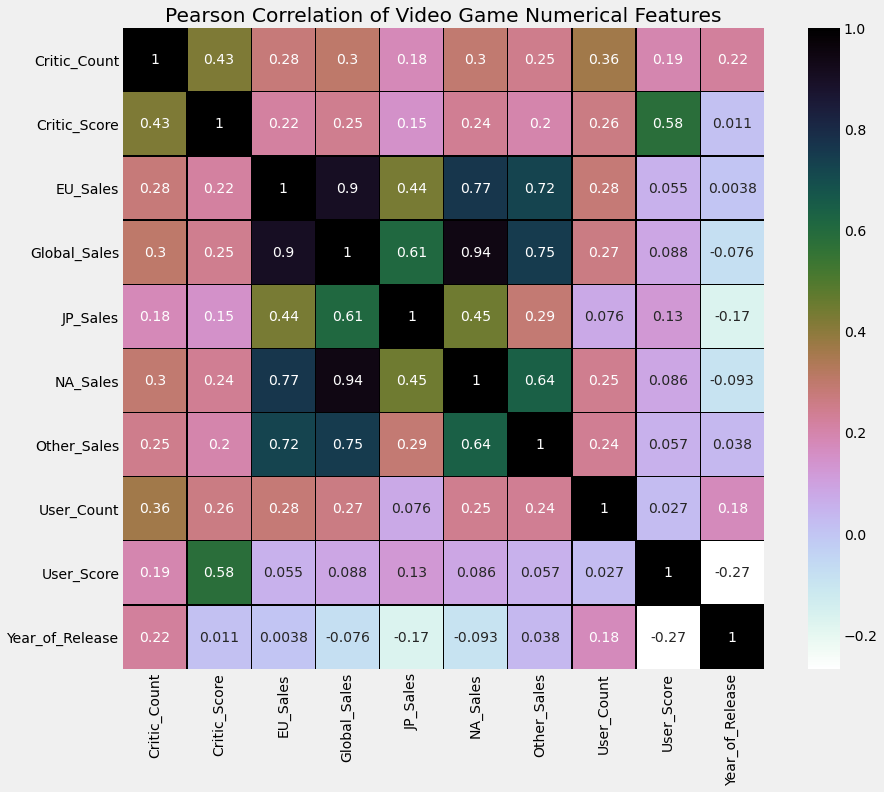

In [5]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in ds.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = ds.columns.difference(str_list) 
# Create Dataframe containing only numerical features
ds_num = ds[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(ds_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [6]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed


In [7]:
ds, rmvd_global = rm_outliers(ds, ["Global_Sales"])

In [8]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,56.152225
User_Score,56.152225
Critic_Count,52.544537
Critic_Score,52.544537
Rating,41.165954
Developer,40.246472
Year_of_Release,1.653790
Publisher,0.338420
Genre,0.006385
Name,0.006385


In [9]:
print(pd.value_counts(ds["Platform"]))

DS      2081
PS2     1985
Wii     1241
PS3     1211
PSP     1188
X360    1129
PS      1110
PC       938
XB       807
GBA      790
GC       541
3DS      490
PSV      431
PS4      335
N64      289
XOne     221
SNES     211
SAT      172
WiiU     137
2600     125
GB        65
NES       62
DC        50
GEN       21
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


In [10]:
ds = ds[(ds['Platform'] == 'PS3') | (ds['Platform'] == 'PS4') | (ds['Platform'] == 'X360') | (ds['Platform'] == 'XOne') | (ds['Platform'] == 'Wii') | (ds['Platform'] == 'WiiU') | (ds['Platform'] == 'PC')]
print(pd.value_counts(ds["Platform"]))

#Let's see the shape of the data again
print(ds.shape)

#Lets see the missing ratios again
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

Wii     1241
PS3     1211
X360    1129
PC       938
PS4      335
XOne     221
WiiU     137
Name: Platform, dtype: int64
(5212, 16)


,Missing Ratio
Critic_Count,39.543361
Critic_Score,39.543361
User_Count,36.646201
User_Score,36.646201
Rating,24.980814
Developer,22.774367
Year_of_Release,1.937836
Publisher,0.249424


In [11]:
ds = ds.dropna(subset=['Critic_Score'])

#Let's see the shape of the data again
print(ds.shape)

#Lets see the missing ratios again
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(3151, 16)


,Missing Ratio
User_Count,5.585528
User_Score,5.585528
Rating,2.253253
Year_of_Release,2.094573
Developer,0.095208
Publisher,0.095208


In [12]:
ds['Publisher'] = ds['Publisher'].fillna(ds['Publisher'].mode()[0])
ds['Developer'] = ds['Developer'].fillna(ds['Developer'].mode()[0])
ds['Rating'] = ds['Rating'].fillna(ds['Rating'].mode()[0])
ds['Year_of_Release'] = ds['Year_of_Release'].fillna(ds['Year_of_Release'].median())
#There's "tbd" values in the mix here which we need to handle first
ds['User_Score'] = ds['User_Score'].replace('tbd', None)

#Now we can handle the N/A's appropriately
ds['User_Score'] = ds['User_Score'].fillna(ds['User_Score'].median())

ds['User_Count'] = ds['User_Count'].fillna(ds['User_Count'].median())



In [13]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# App: Using Label Encoder change the type from object to int64
ds['Platform'] = le.fit_transform(ds['Platform'])
ds['Genre'] = le.fit_transform(ds['Genre'])
ds['Rating'] = le.fit_transform(ds['Rating'])
ds['Name'] = le.fit_transform(ds['Name'])

In [15]:
ds = ds.drop(['Year_of_Release', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [16]:
ds.head()

,Name,Platform,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
1060,160,1,8,1.69,94.0,27.0,8.5,1863.0,2
1070,655,3,5,1.68,37.0,4.0,7.1,50.0,0
1071,1133,5,6,1.68,64.0,62.0,5.9,104.0,4
1074,1503,3,4,1.68,78.0,58.0,8.5,301.0,0
1075,1400,1,0,1.68,82.0,50.0,7.9,135.0,2


In [17]:
X = ds['Critic_Score'].values.reshape(-1,1)
Y = ds['Global_Sales'].values.reshape(-1,1)

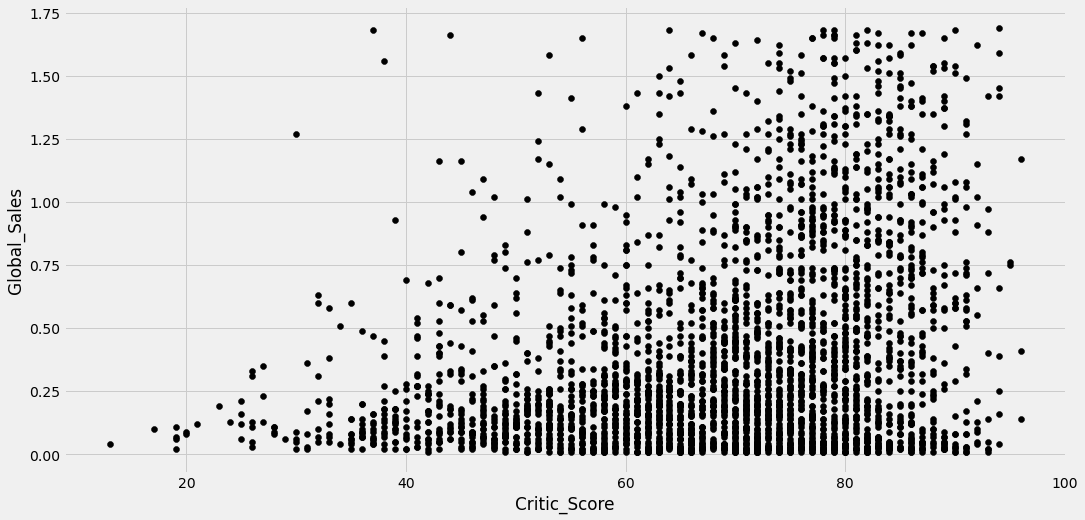

In [18]:
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    Y,
    c='black'
)
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")
plt.show()

In [19]:
# This regression model shows that the higher Critic Score a game has, the higher global sales has.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

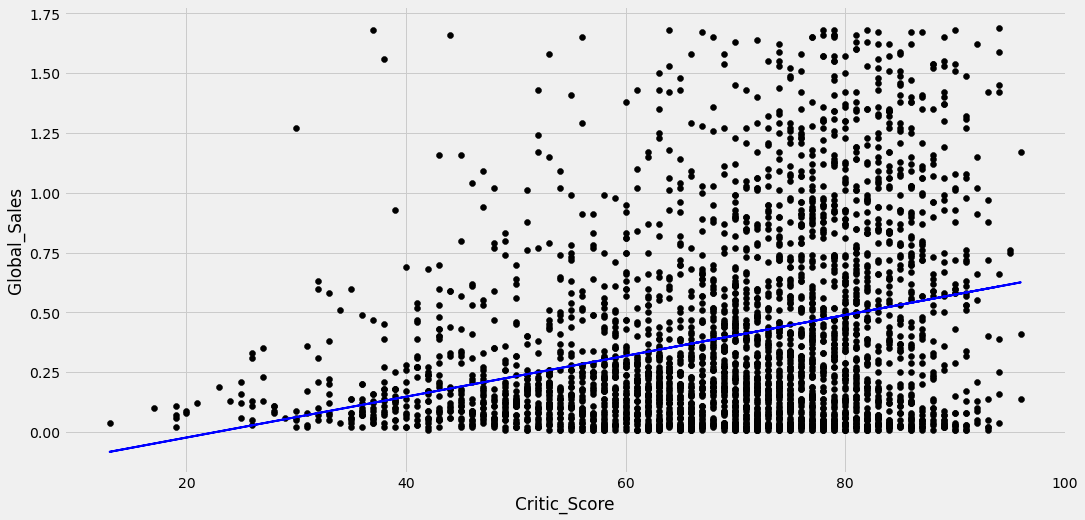

In [21]:
pred = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    Y,
    c='black'
)
plt.plot(
    X,
    pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")
plt.show()

In [22]:
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = -0.19346 + 0.0085335X


In [23]:
from sklearn import metrics
import math
from sklearn.metrics import accuracy_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, pred)))
print('R2:', metrics.r2_score(Y, pred))


Mean Absolute Error: 0.2936619915570284
Mean Squared Error: 0.14495804765976614
Root Mean Squared Error: 0.38073356518668816
R2: 0.091172891392852


In [24]:
#Lets now use add more features to our model and make it a multiple linear regression
# And see if our model improves, based on RMSE and R^2 scores

In [25]:
ds.head()

,Name,Platform,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
1060,160,1,8,1.69,94.0,27.0,8.5,1863.0,2
1070,655,3,5,1.68,37.0,4.0,7.1,50.0,0
1071,1133,5,6,1.68,64.0,62.0,5.9,104.0,4
1074,1503,3,4,1.68,78.0,58.0,8.5,301.0,0
1075,1400,1,0,1.68,82.0,50.0,7.9,135.0,2


In [26]:
X1 = ds[['Critic_Score', 'User_Score', 'Critic_Count', 'User_Count', 'Rating', 'Genre', 'Name', 'Platform']].values

In [27]:
Y1 = ds['Global_Sales'].values

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2363, 8)
Y_train shape: (2363,)
X_test shape: (788, 8)
Y_test shape: (788,)


In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X_train)
  
X_train = sc.transform(X_train) 
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train, Y_train)
pred1 = reg1.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error
import math
r2_score = r2_score(Y_test, pred1)
rmse = math.sqrt(mean_squared_error(Y_test, pred1))

print(f"r2 score of the model : {r2_score:.3f}")
print(f"Root Mean Squared Error of the model : {rmse:.3f}")

r2 score of the model : 0.239
Root Mean Squared Error of the model : 0.364


In [32]:
#Finally, by adding more features our model improved based on R^2 and RMSE values,
#Since R^2 value increased and RMSE value decreased compare to the first model.

In [33]:
#Now let's try to get accuracy score for train and test data separately

In [34]:
Accuracy = reg1.score(X_train, Y_train)
print("Accuracy in the training data: ", Accuracy)

accuracy = reg1.score(X_test, Y_test)
print("Accuracy in the test data", accuracy)

Accuracy in the training data:  0.24480877470682716
Accuracy in the test data 0.23874042473420964


In [35]:
#Trained data has better accuracy than the test data.